In [47]:
%load_ext autoreload
%autoreload 2
import math
from easing import easing
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
# Create polygon coordinates
def get_polygon_coords(n, radius):
    return [(radius * math.cos(2 * math.pi * i / n), radius * math.sin(2 * math.pi * i / n)) for i in range(n)]


# Move the polygon coordinates
def move_coordinates(coordinates_list, vector):
    return [(x + vector[0], y + vector[1]) for x, y in coordinates_list]


# Rotate the polygon coordinates
def rotate_coordinates(coordinates_list, angle):
    angle_rad = math.radians(angle)  # Convert the angle to radians
    return [(x*math.cos(angle_rad) - y*math.sin(angle_rad), x*math.sin(angle_rad) + y*math.cos(angle_rad)) for x, y in coordinates_list]

In [49]:
n = 6       # number of sides
radius = 1  # radius

# Polygon's original coordinates
polygon_coords = get_polygon_coords(n, radius)

# Polygon's translation vectors, based on the polygons geometry itself (fyi, it could be any vectors)
translation_vector = get_polygon_coords(n, radius=1.5)

# Polygon's rotation angle, based on the polygons geometry itself (fyi, it could be any angle)
rotation_angle = (n - 2) * 180 / n

In [50]:
# Append the first keyframe, which is the polygon's original position
keyframes_list = [polygon_coords]

# Iterate over the next five keyframes
for i in range(5):
    
    # Move and rotate the polygon's coordinates 
    polygon_coords = move_coordinates(polygon_coords, translation_vector[i])
    polygon_coords = rotate_coordinates(polygon_coords, rotation_angle)
    
    # Append the new keyframe
    keyframes_list.append(polygon_coords)

MovieWriter imagemagick unavailable; using Pillow instead.


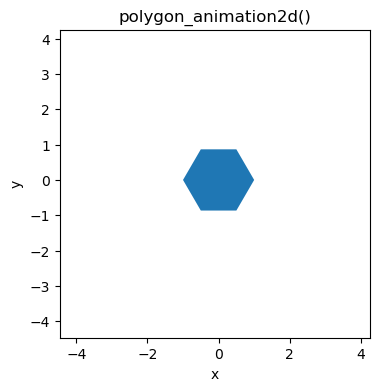

In [52]:
# Flatten and stack the keyframes into a pandas DataFrame    
data_df = pd.DataFrame(np.vstack([np.array(keyframe).reshape(1, -1) for keyframe in keyframes_list]))

# Create an Eased object
eased_data = easing.Eased(data_df, wrap=True)

# Apply a power ease
eased_data.power_ease(n=3, fpt=15)

# Create the animation
eased_data.polygon_animation2d(duration=1.5, 
                               feat_kws={'facecolor':"#1f77b4"},
                               ax_kws={'xlabel':'x', 'ylabel':'y', 'title':'polygon_animation2d()'},
                               destination='media/dancing_polygon.gif', figsize=(4,4),
                               )